### REGULATORY AFFAIRS OF ROAD ACCIDENTS IN INIDA-2020

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize']=(12, 6)

In [5]:
# Load data
df=pd.read_csv("Regulatory Affairs of Road Accident Data 2020 India.csv");
df.head()

,City,Category,Subcategory,Outcome,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [6]:
df.isna().sum()

City           0
Category       0
Subcategory    0
Outcome        0
Count          3
dtype: int64

In [9]:
df.dtypes.to_frame('dtype')

,dtype
City,object
Category,object
Subcategory,object
Outcome,object
Count,float64


In [11]:
df['Count'].describe()

count    9547.000000
mean      103.627632
std       275.189303
min         0.000000
25%         0.000000
50%        12.000000
75%        70.500000
max      3148.000000
Name: Count, dtype: float64

In [13]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

City: 50 unique values
Category: 6 unique values
Subcategory: 35 unique values
Outcome: 5 unique values
Count: 800 unique values


#### Exploratory Data Analysis

##### Number of Accidents per City

In [15]:
city_counts=df.groupby("City")["Count"].sum().sort_values(ascending=False);
city_counts.head()

City
Chennai      78459.0
Delhi        72526.0
Jabalpur     57715.0
Bengaluru    53535.0
Indore       50098.0
Name: Count, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

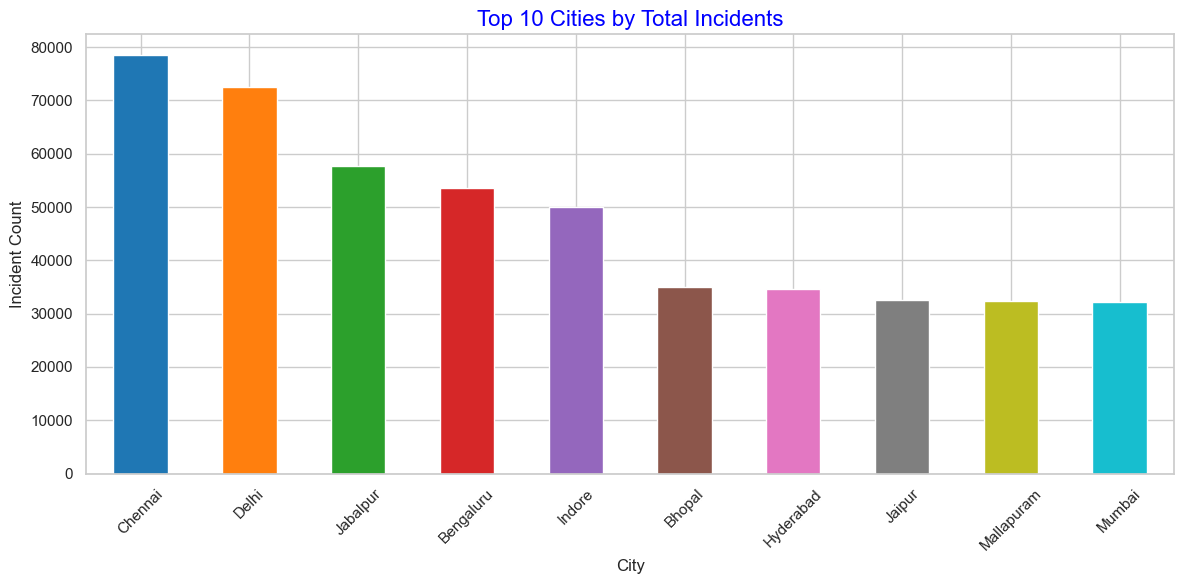

In [22]:
plt.figure(figsize=(12, 6))
city_counts.head(10).plot(kind='bar', color=plt.cm.tab10.colors)
plt.title("Top 10 Cities by Total Incidents", fontsize=16, color="blue")
plt.xlabel("City")
plt.ylabel("Incident Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

##### Number of Accidents by Category

In [21]:
cat_count=df.groupby("Category")["Count"].sum().sort_values(ascending=False);
cat_count.head(6)

Category
Junction                    173308.0
Road Features               173308.0
Traffic Violation           173308.0
Traffic Control             173308.0
Weather                     173308.0
Impacting Vehicle/Object    122793.0
Name: Count, dtype: float64

C:\Users\dell\AppData\Local\Temp\ipykernel_12060\2646201651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_count.index, y=cat_count.values, palette="coolwarm")


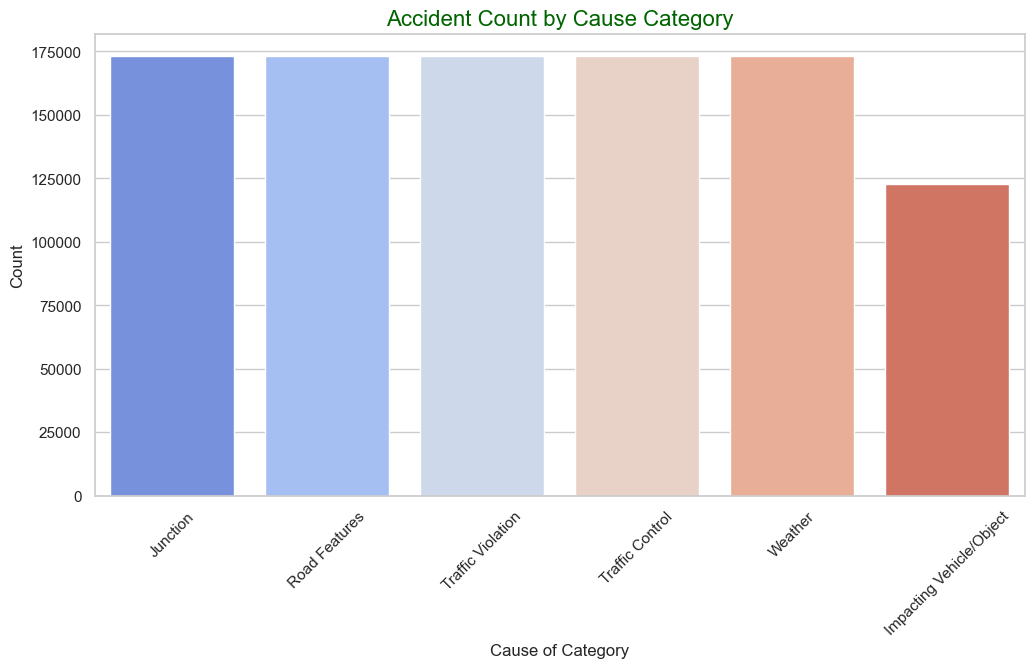

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x=cat_count.index, y=cat_count.values, palette="coolwarm")
plt.title("Accident Count by Cause Category", fontsize=16, color="darkgreen")
plt.xlabel("Cause of Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##### Number of Accidents by Subcategory

In [34]:
subcat_count=df.groupby("Subcategory")["Count"].sum().sort_values(ascending=False);
subcat_count.head()

Subcategory
Others           283486.0
Sunny/Clear      126904.0
Over             123013.0
Straight Road    104223.0
Two Wheelers      54356.0
Name: Count, dtype: float64

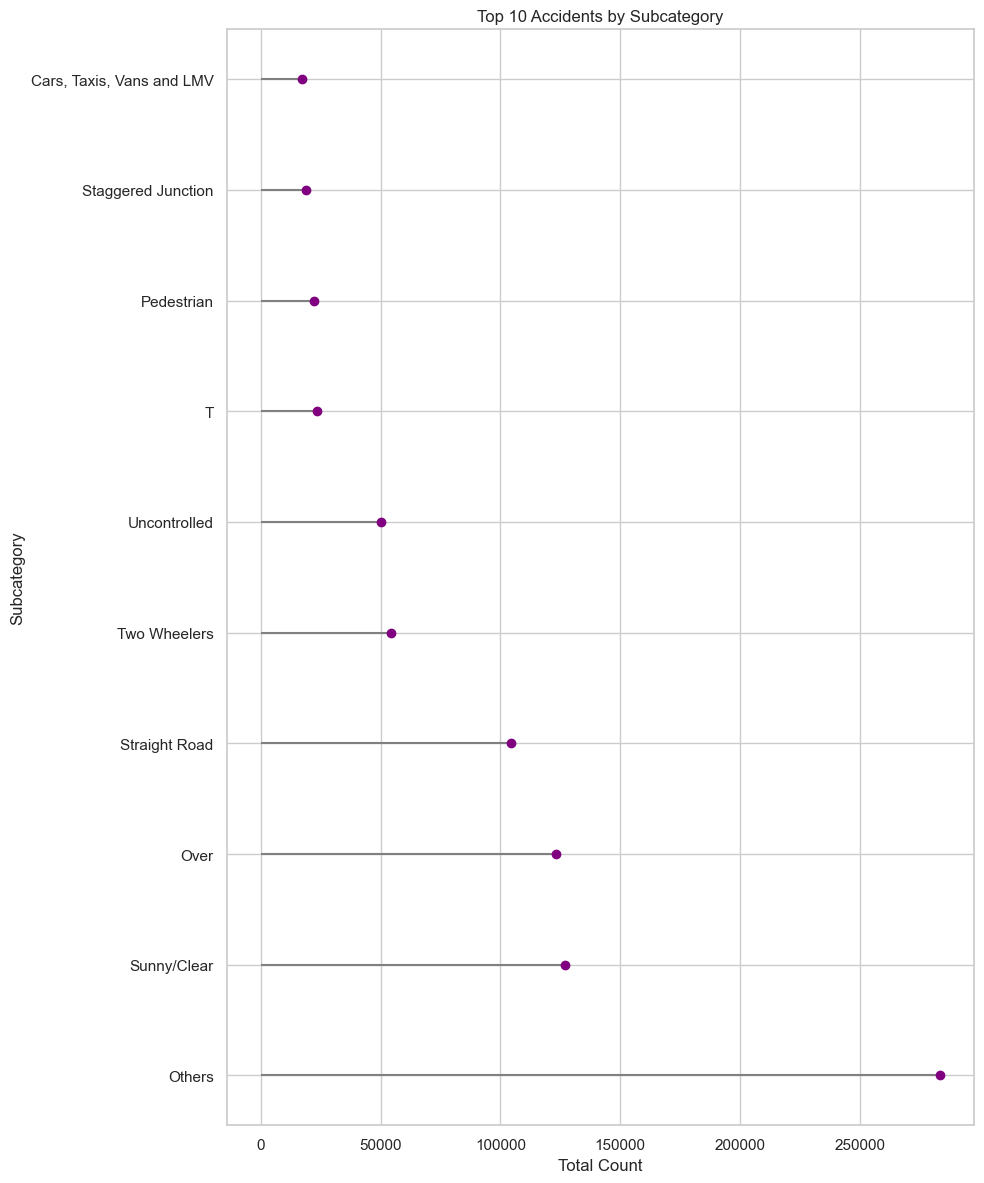

In [35]:
plt.figure(figsize=(10, 12))

plt.hlines(y=subcat_count.index[:10],
           xmin=0,
           xmax=subcat_count.values[:10],
           color='gray')

plt.plot(subcat_count.values[:10],
         subcat_count.index[:10],
         "o", color='purple')

plt.title("Top 10 Accidents by Subcategory")
plt.xlabel("Total Count")
plt.ylabel("Subcategory")
plt.tight_layout()
plt.show()

##### Outcome Distribution

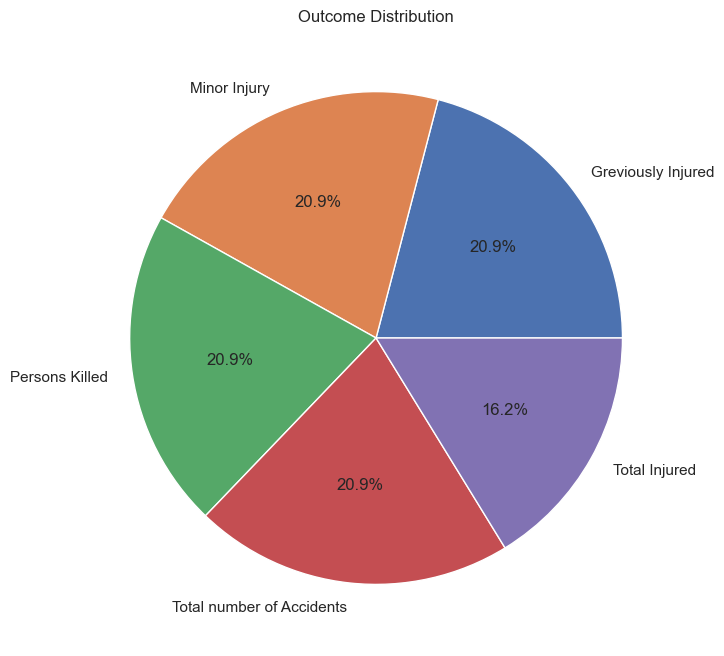

In [36]:
plt.figure(figsize=(8, 8))
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Outcome Distribution")
plt.ylabel("")
plt.show()

##### Heatmap: Major Cities vs Category

In [38]:
top_cities=df.groupby("City")["Count"].sum().sort_values(ascending=False).head(10).index;
top_cities

Index(['Chennai', 'Delhi', 'Jabalpur', 'Bengaluru', 'Indore', 'Bhopal',
       'Hyderabad', 'Jaipur', 'Mallapuram', 'Mumbai'],
      dtype='object', name='City')

In [39]:
df_top=df[df["City"].isin(top_cities)];
df_top

,City,Category,Subcategory,Outcome,Count
180,Bengaluru,Traffic Control,Flashing Signal/Blinker,Greviously Injured,33.0
181,Bengaluru,Traffic Control,Flashing Signal/Blinker,Minor Injury,33.0
182,Bengaluru,Traffic Control,Flashing Signal/Blinker,Persons Killed,9.0
183,Bengaluru,Traffic Control,Flashing Signal/Blinker,Total Injured,66.0
184,Bengaluru,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,67.0
...,...,...,...,...,...
9170,Mumbai,Weather,Sunny/Clear,Greviously Injured,1297.0
9171,Mumbai,Weather,Sunny/Clear,Minor Injury,443.0
9172,Mumbai,Weather,Sunny/Clear,Persons Killed,349.0
9173,Mumbai,Weather,Sunny/Clear,Total number of Accidents,1812.0


In [43]:
pivot_city_cat=df_top.pivot_table(
    values="Count",
    index="City",
    columns="Category",
    aggfunc="sum",
    fill_value=0
);
pivot_city_cat

Category,Impacting Vehicle/Object,Junction,Road Features,Traffic Control,Traffic Violation,Weather
City,,,,,,
Bengaluru,6630.0,9381.0,9381.0,9381.0,9381.0,9381.0
Bhopal,4339.0,6146.0,6146.0,6146.0,6146.0,6146.0
Chennai,9524.0,13787.0,13787.0,13787.0,13787.0,13787.0
Delhi,9036.0,12698.0,12698.0,12698.0,12698.0,12698.0
Hyderabad,4210.0,6102.0,6102.0,6102.0,6102.0,6102.0
Indore,6143.0,8791.0,8791.0,8791.0,8791.0,8791.0
Jabalpur,6905.0,10162.0,10162.0,10162.0,10162.0,10162.0
Jaipur,4114.0,5682.0,5682.0,5682.0,5682.0,5682.0
Mallapuram,3859.0,5687.0,5687.0,5687.0,5687.0,5687.0


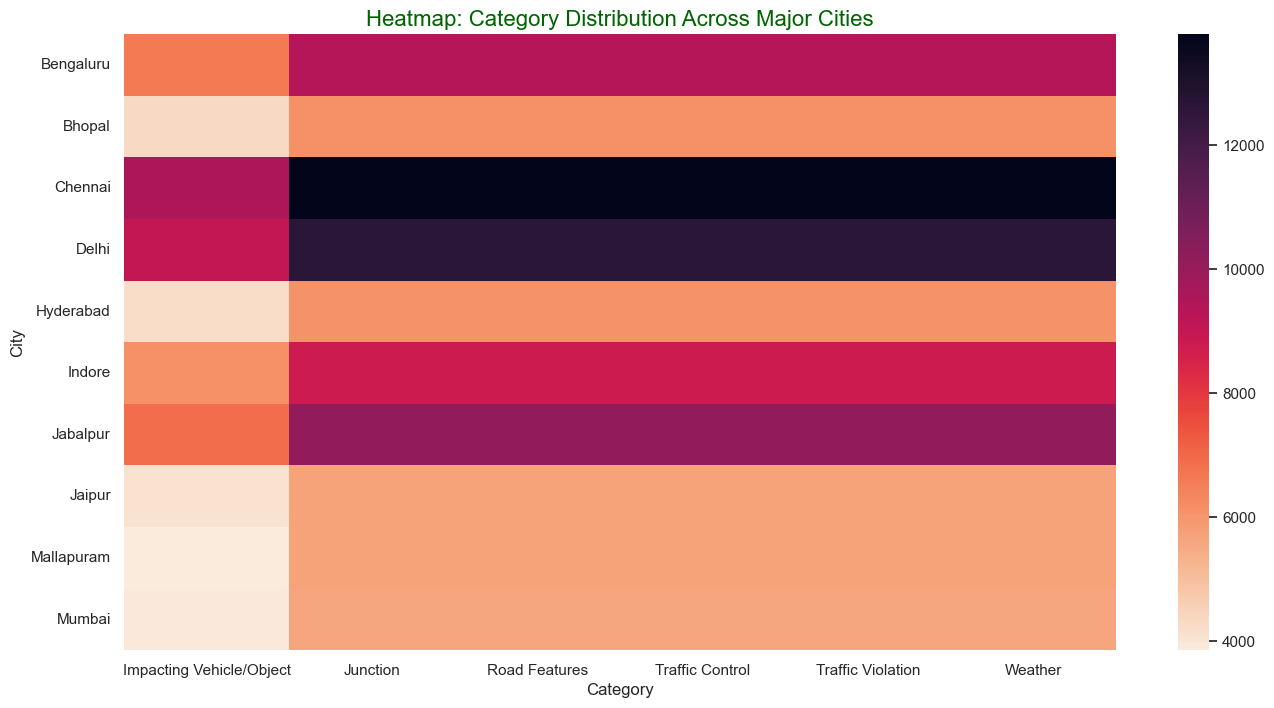

In [46]:
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_city_cat, cmap="rocket_r")
plt.title("Heatmap: Category Distribution Across Major Cities", fontsize=16, color="darkgreen")
plt.xlabel("Category")
plt.ylabel("City")
plt.show()

#### Model Prediction

In [71]:
# Using copy to avoid modifying original data
data=df.copy();
data.head()

,City,Category,Subcategory,Outcome,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [72]:
data["Count"]=data["Count"].fillna(0);

In [74]:
y=data["Outcome"];        # target variable
y.head()

0           Greviously Injured
1                 Minor Injury
2               Persons Killed
3                Total Injured
4    Total number of Accidents
Name: Outcome, dtype: object

In [77]:
x=data[["City", "Category", "Subcategory", "Count"]];       # Predictors
x.head()

,City,Category,Subcategory,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,0.0


In [78]:
categorical_cols=["City", "Category", "Subcategory"];

In [79]:
preprocess=ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", ["Count"])
    ]
);
preprocess

,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


In [82]:
x_train, x_test, y_train, y_test=train_test_split(
    x, y, test_size=0.25, random_state=42, stratify=y
)

In [83]:
model=RandomForestClassifier(
    n_estimators=250,
    random_state=42,
    max_depth=None,
    class_weight="balanced"
);
model

,n_estimators,250
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [84]:
# Create pipeline: preprocessing ML model
pipeline=Pipeline(steps=[
    ("preprocessor", preprocess),
    ("classifier", model)
]);
pipeline

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [85]:
# Train model
pipeline.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [86]:
# Prediction
y_pred=pipeline.predict(x_test);
y_pred

array(['Greviously Injured', 'Minor Injury', 'Persons Killed', ...,
       'Persons Killed', 'Total number of Accidents', 'Persons Killed'],
      dtype=object)

In [92]:
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

       Greviously Injured       0.05      0.05      0.05       500
             Minor Injury       0.03      0.03      0.03       500
           Persons Killed       0.05      0.04      0.04       500
            Total Injured       0.01      0.01      0.01       388
Total number of Accidents       0.08      0.06      0.07       500

                 accuracy                           0.04      2388
                macro avg       0.04      0.04      0.04      2388
             weighted avg       0.05      0.04      0.04      2388



In [93]:
cm=confusion_matrix(y_test, y_pred);
cm

array([[ 25, 113, 162, 132,  68],
       [137,  17, 155, 123,  68],
       [166, 183,  21,  85,  45],
       [ 93,  84,  66,   4, 141],
       [ 68,  90,  59, 254,  29]])

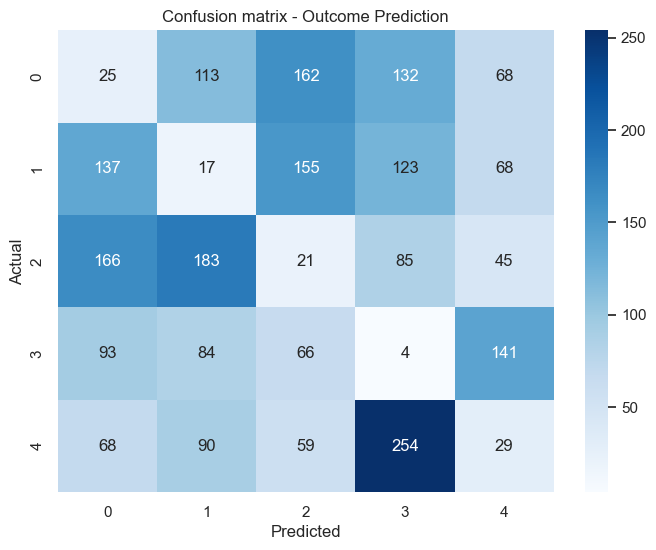

In [94]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix - Outcome Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Summary

In [ ]:
# The RF-based prediction model successfully classifies accident outcomes using historical accident causes and 
# city-level patterns. By learning complex relationships between the cause categories, accident frequencies, and
# locations, the model provides a data-driven method to predict whether an incident is likely to result in minor
# injury, grievous injury, fatality, or no injury. This predictive capability supports regulatory authorities in 
# implementing targeted interventions, strengthening road safety measures, and prioritizing high-risk regions.